```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__KNeighborsClassifier__ Classifier implementing the k-nearest neighbors vote.


### Goal
Ceate a supervised learning model that use classification methods.

### Tools
1. Pandas
2. scikit-learn
3. KNeighborsClassifier 

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/classifier',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd

import functions_classifier as func
from  load_dataset import LoadDataset

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_clf()

### Split dataset into train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


In [19]:
y_test.value_counts()

Q4    188
Q3    178
Q1    168
Q2    160
Name: indriscocat, dtype: int64

## Modeling

#### Building, train and predict model

In [5]:
params = {
   "n_jobs": 8, 
   "algorithm": "auto", 
   "leaf_size": 20, 
   "n_neighbors": 5, 
   "p": 1, 
   "weights": "distance"
}
    
classifier = KNeighborsClassifier(**params)
pipeline = make_pipeline(
    StandardScaler(),
    classifier
)

_ = pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

#### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [6]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {
#     "n_neighbors": [5, 10, 20, 30, 40, 50],
#     "weights": ("uniform", "distance"),
#     "algorithm": ("auto", "ball_tree", "kd_tree", "brute"),
#     "leaf_size": [20, 30, 40, 50, 60],
#     "p": [1, 2, 4, 6, 8]
# }

# gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
# gridsearch.fit(scale(X_train), y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:", gridsearch.best_score_)

### Predict and show model result

In [7]:
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.61771058 0.60043197 0.63714903 0.55194805 0.57575758]
Mean = 0.60 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[118  31  14   5]
 [ 32  72  45  11]
 [ 11  42  82  43]
 [  4   5  33 146]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

          Q1       0.72      0.70      0.71       168
          Q2       0.48      0.45      0.46       160
          Q3       0.47      0.46      0.47       178
          Q4       0.71      0.78      0.74       188

    accuracy                           0.60       694
   macro avg       0.59      0.60      0.60       694
weighted avg       0.60      0.60      0.60       694

----------------------------------------------------------------------
Accuracy: 0.60
Precici

### Display Confusion Matrix

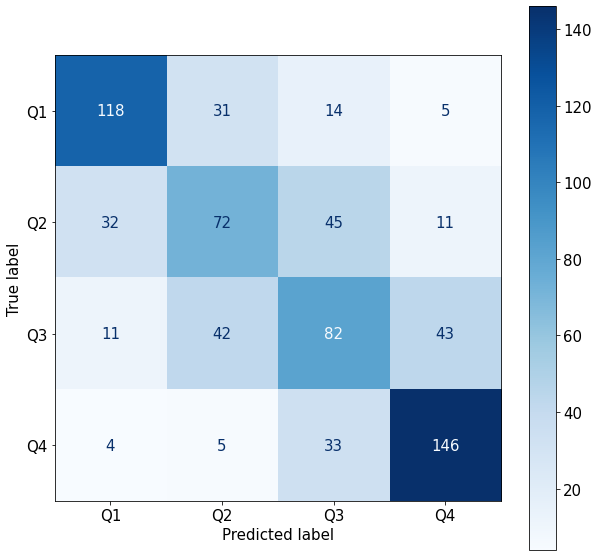

In [8]:
func.display_confusion_matrix(pipeline, y_test, y_predict)